In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import torch
torch.cuda.set_device('cuda:3')
from matplotlib import pyplot as plt

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity, AgentWrapper, ActionTrackingStateAugmentation


logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 4000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=4000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|

  Episode 1 ended at t=718 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/290 (0.06)
    explore-remote: 20/377 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 93
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8446, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 2|Iteration 20|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 2|Iteration 20|reward:  134.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 2|

  Episode 2 ended at t=458 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/165 (0.11)
    explore-remote: 20/241 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 56
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8113, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 32|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 32|reward:  132.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 ended at t=946 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/397 (0.05)
    explore-remote: 20/497 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 207
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7471, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 18|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 18|reward:  134.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 4|It

  Episode 4 ended at t=626 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/236 (0.08)
    explore-remote: 19/340 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 173
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7078, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 13|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 5|Iteration 20|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 5|Iteration 20|reward:  132.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episod

  Episode 5 ended at t=617 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/238 (0.07)
    explore-remote: 20/329 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 167
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6715, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iteration 14|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|Iteration 16|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|Iteration 16|reward:  136.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 

  Episode 6 ended at t=550 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/222 (0.08)
    explore-remote: 20/277 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 167
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6409, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:  135.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 14|reward:  137.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Itera

  Episode 7 ended at t=272 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/96 (0.16)
    explore-remote: 18/129 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 102
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6264, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 11|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 11|reward:  136.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 8|Iter

  Episode 8 ended at t=593 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/210 (0.09)
    explore-remote: 20/331 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 235
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5961, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:  114.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:  116.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 9|Iteration 24|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 9|Iteration 24|reward:  118.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 9|Iteration 29|reward:  132.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 9|Iteration 29|reward:  132.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episod

  Episode 9 ended at t=507 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/179 (0.10)
    explore-remote: 20/276 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 204
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5715, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:  136.0|last_reward_at:   11|Elapsed Time: 0:00:00||


  Episode 10 ended at t=283 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/103 (0.16)
    explore-remote: 18/131 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 111
simulation ended


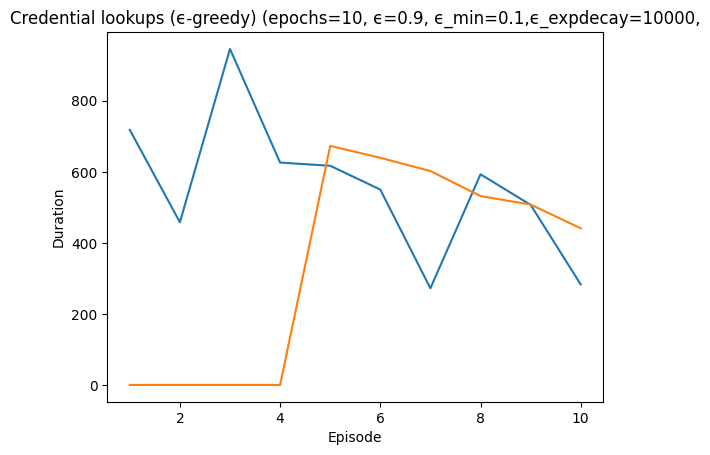

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=4000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   14.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:   16.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:   16.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 1|Iteration 20|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 1|Iteration 20|reward:  116.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:  130.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:  130.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:  230.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:  230.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episod

  Episode 1 ended at t=841 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/160 (0.10)
    explore-remote: 20/295 (0.06)
    explore-connect: 0/283 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 0/30 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 81
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.7624, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Ite

  Episode 2 ended at t=389 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/81 (0.12)
    explore-remote: 17/116 (0.13)
    explore-connect: 0/125 (0.00)
    exploit-local: 6/14 (0.30)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 73
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.7060, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=789 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/167 (0.07)
    explore-remote: 18/233 (0.07)
    explore-connect: 1/289 (0.00)
    exploit-local: 6/8 (0.43)
    exploit-remote: 1/43 (0.02)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 196
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.6044, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=465 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/81 (0.13)
    explore-remote: 16/151 (0.10)
    explore-connect: 0/155 (0.00)
    exploit-local: 7/3 (0.70)
    exploit-remote: 2/27 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 140
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.5517, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 5|Iter

  Episode 5 ended at t=850 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/196 (0.07)
    explore-remote: 17/276 (0.06)
    explore-connect: 0/291 (0.00)
    exploit-local: 6/12 (0.33)
    exploit-remote: 1/26 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 359
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.4670, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iter

  Episode 6 ended at t=1597 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/327 (0.05)
    explore-remote: 17/439 (0.04)
    explore-connect: 0/435 (0.00)
    exploit-local: 4/4 (0.50)
    exploit-remote: 3/341 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 561
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.3420, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iterat

  Episode 7 ended at t=856 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/157 (0.10)
    explore-remote: 17/208 (0.08)
    explore-connect: 1/269 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 3/165 (0.02)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 393
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.2898, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 16|reward:  240.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Itera

  Episode 8 ended at t=574 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/115 (0.08)
    explore-remote: 17/153 (0.10)
    explore-connect: 0/168 (0.00)
    exploit-local: 6/3 (0.67)
    exploit-remote: 1/90 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 300
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.2594, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iterat

  Episode 9 ended at t=292 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/45 (0.17)
    explore-remote: 15/92 (0.14)
    explore-connect: 0/113 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 197
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.2453, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 10 ended at t=225 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/33 (0.27)
    explore-remote: 15/66 (0.19)
    explore-connect: 0/82 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 155
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.2349, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:  246.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 11 ended at t=252 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/55 (0.17)
    explore-remote: 18/64 (0.22)
    explore-connect: 0/87 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 174
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.2239, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 12|Iteration 8|reward:  240.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 12 ended at t=553 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/134 (0.10)
    explore-remote: 20/179 (0.10)
    explore-connect: 0/181 (0.00)
    exploit-local: 6/6 (0.50)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 423
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.2015, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 13 ended at t=441 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/106 (0.07)
    explore-remote: 14/130 (0.10)
    explore-connect: 0/163 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 332
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.1853, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 14 ended at t=414 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/89 (0.12)
    explore-remote: 16/120 (0.12)
    explore-connect: 0/143 (0.00)
    exploit-local: 5/15 (0.25)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 312
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.1714, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 10|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 10|reward:  239.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 15|Iteration 15|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||
E

  Episode 15 ended at t=477 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/102 (0.13)
    explore-remote: 19/154 (0.11)
    explore-connect: 0/154 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/16 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 370
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.1567, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 16 ended at t=835 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/174 (0.06)
    explore-remote: 17/198 (0.08)
    explore-connect: 0/220 (0.00)
    exploit-local: 8/14 (0.36)
    exploit-remote: 0/181 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 501
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.1341, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 25|reward:  245.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 17 ended at t=346 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/84 (0.07)
    explore-remote: 15/73 (0.17)
    explore-connect: 0/90 (0.00)
    exploit-local: 12/55 (0.18)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 226
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.1258, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 18 ended at t=383 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/87 (0.09)
    explore-remote: 20/117 (0.15)
    explore-connect: 0/125 (0.00)
    exploit-local: 7/3 (0.70)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 303
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.1173, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 19 ended at t=503 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/120 (0.10)
    explore-remote: 20/152 (0.12)
    explore-connect: 0/177 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 427
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.1070, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 20 ended at t=634 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/167 (0.07)
    explore-remote: 18/205 (0.08)
    explore-connect: 0/198 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/16 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 541
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.0955, γ=0.015,learning_rate=0.01,Q%=100


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 21|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 21|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 21|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 21|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 21|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 21|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 21|Iteration 9|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 21|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 21 ended at t=516 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/113 (0.11)
    explore-remote: 18/158 (0.10)
    explore-connect: 0/176 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/18 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 420
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.0871, γ=0.015,learning_rate=0.01,Q%=100


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 22|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 22|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 22|Iteration 8|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 22|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 22|Iteration 11|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 22 ended at t=477 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/91 (0.13)
    explore-remote: 19/117 (0.14)
    explore-connect: 0/131 (0.00)
    exploit-local: 5/29 (0.15)
    exploit-remote: 1/59 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 329
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.0801, γ=0.015,learning_rate=0.01,Q%=100


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 23|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 23|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 23|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 23 ended at t=264 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/64 (0.12)
    explore-remote: 20/64 (0.24)
    explore-connect: 0/89 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 217
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.0765, γ=0.015,learning_rate=0.01,Q%=100


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 24|Iteration 8|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 24 ended at t=522 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/126 (0.11)
    explore-remote: 17/157 (0.10)
    explore-connect: 0/166 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 3/23 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 437
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.0699, γ=0.015,learning_rate=0.01,Q%=100


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 25|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 25 ended at t=473 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/108 (0.09)
    explore-remote: 19/122 (0.13)
    explore-connect: 0/147 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 1/47 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 374
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0645, γ=0.015,learning_rate=0.01,Q%=100


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 7|reward:  240.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 26 ended at t=422 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/96 (0.09)
    explore-remote: 17/133 (0.11)
    explore-connect: 0/136 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/12 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 371
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0601, γ=0.015,learning_rate=0.01,Q%=100


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 27 ended at t=216 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/50 (0.18)
    explore-remote: 16/52 (0.24)
    explore-connect: 0/69 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 176
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0580, γ=0.015,learning_rate=0.01,Q%=100


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 28|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 28|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 28|Iteration 11|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 28|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 28|Iteration 14|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||
E

  Episode 28 ended at t=225 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/40 (0.18)
    explore-remote: 19/59 (0.24)
    explore-connect: 0/69 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 184
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0558, γ=0.015,learning_rate=0.01,Q%=100


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 29|Iteration 7|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 29|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 29 ended at t=376 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/91 (0.12)
    explore-remote: 18/102 (0.15)
    explore-connect: 0/135 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 338
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0525, γ=0.015,learning_rate=0.01,Q%=100


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 30|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 30|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 30|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 30 ended at t=489 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/115 (0.10)
    explore-remote: 20/129 (0.13)
    explore-connect: 0/153 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/42 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 399
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0486, γ=0.015,learning_rate=0.01,Q%=100


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 8|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 31|Iteration 18|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 31 ended at t=1221 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/287 (0.05)
    explore-remote: 18/336 (0.05)
    explore-connect: 0/326 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/221 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 933
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0402, γ=0.015,learning_rate=0.01,Q%=100


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 32|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 32|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 32|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 32 ended at t=531 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/92 (0.13)
    explore-remote: 15/131 (0.10)
    explore-connect: 0/178 (0.00)
    exploit-local: 6/84 (0.07)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 408
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0372, γ=0.015,learning_rate=0.01,Q%=100


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 33|Iteration 9|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 33|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 33|Iteration 15|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 33 ended at t=379 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/79 (0.12)
    explore-remote: 15/110 (0.12)
    explore-connect: 0/127 (0.00)
    exploit-local: 7/19 (0.27)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 329
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0352, γ=0.015,learning_rate=0.01,Q%=100


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 34|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 34|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 34|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 34|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 34|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 34 ended at t=445 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/98 (0.12)
    explore-remote: 16/127 (0.11)
    explore-connect: 0/122 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/49 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 364
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0330, γ=0.015,learning_rate=0.01,Q%=100


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 35|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 35 ended at t=275 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/63 (0.15)
    explore-remote: 17/74 (0.19)
    explore-connect: 0/92 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 251
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0318, γ=0.015,learning_rate=0.01,Q%=100


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 36|Iteration 12|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epi

  Episode 36 ended at t=232 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/42 (0.19)
    explore-remote: 18/52 (0.26)
    explore-connect: 0/71 (0.00)
    exploit-local: 7/21 (0.25)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 187
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0308, γ=0.015,learning_rate=0.01,Q%=100


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 37 ended at t=331 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/79 (0.10)
    explore-remote: 19/94 (0.17)
    explore-connect: 0/110 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 306
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0295, γ=0.015,learning_rate=0.01,Q%=100


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 38|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 38|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 38 ended at t=290 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/75 (0.13)
    explore-remote: 18/68 (0.21)
    explore-connect: 0/100 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 265
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0284, γ=0.015,learning_rate=0.01,Q%=100


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 39|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 39|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 39|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 39|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 9|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 39|Iteration 12|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 39 ended at t=196 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/45 (0.20)
    explore-remote: 15/61 (0.20)
    explore-connect: 0/47 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 173
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0277, γ=0.015,learning_rate=0.01,Q%=100


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 8|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 40 ended at t=260 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/52 (0.21)
    explore-remote: 17/78 (0.18)
    explore-connect: 0/84 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 232
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0268, γ=0.015,learning_rate=0.01,Q%=100


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 11|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 11|reward:  239.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 41|Iteration 13|reward:  245.0|last_reward_at:   11|Elapsed Time: 0:00:00||
E

  Episode 41 ended at t=163 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/33 (0.23)
    explore-remote: 15/34 (0.31)
    explore-connect: 0/54 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 144
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0262, γ=0.015,learning_rate=0.01,Q%=100


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 42 ended at t=206 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/48 (0.20)
    explore-remote: 18/48 (0.27)
    explore-connect: 0/63 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 183
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0256, γ=0.015,learning_rate=0.01,Q%=100


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 43|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 43|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 43|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 43 ended at t=242 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/46 (0.13)
    explore-remote: 12/59 (0.17)
    explore-connect: 0/85 (0.00)
    exploit-local: 7/15 (0.32)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 202
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0249, γ=0.015,learning_rate=0.01,Q%=100


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 44|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 44|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 44|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 44|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 44|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 44 ended at t=209 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/45 (0.17)
    explore-remote: 14/47 (0.23)
    explore-connect: 0/76 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 185
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0242, γ=0.015,learning_rate=0.01,Q%=100


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 45 ended at t=469 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/120 (0.10)
    explore-remote: 20/144 (0.12)
    explore-connect: 0/154 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 442
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0230, γ=0.015,learning_rate=0.01,Q%=100


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 46|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 46|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 46 ended at t=477 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/127 (0.09)
    explore-remote: 17/131 (0.11)
    explore-connect: 0/172 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 452
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0218, γ=0.015,learning_rate=0.01,Q%=100


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 47 ended at t=544 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/127 (0.09)
    explore-remote: 20/172 (0.10)
    explore-connect: 0/182 (0.00)
    exploit-local: 8/12 (0.40)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 500
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0206, γ=0.015,learning_rate=0.01,Q%=100


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 48|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 48 ended at t=521 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/124 (0.10)
    explore-remote: 20/155 (0.11)
    explore-connect: 0/165 (0.00)
    exploit-local: 7/25 (0.22)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 470
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0195, γ=0.015,learning_rate=0.01,Q%=100


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 10|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epi

  Episode 49 ended at t=658 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/153 (0.09)
    explore-remote: 18/192 (0.09)
    explore-connect: 0/184 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 1/80 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 549
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0184, γ=0.015,learning_rate=0.01,Q%=100


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 50 ended at t=370 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/84 (0.12)
    explore-remote: 19/101 (0.16)
    explore-connect: 0/121 (0.00)
    exploit-local: 7/16 (0.30)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 325
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=4000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/57 (0.14)
    explore-remote: 13/72 (0.15)
    explore-connect: 0/87 (0.00)
    exploit-local: 9/124 (0.07)
    exploit-remote: 4/114 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 238
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=410 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/55 (0.11)
    explore-remote: 13/47 (0.22)
    explore-connect: 0/62 (0.00)
    exploit-local: 10/140 (0.07)
    exploit-remote: 5/60 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 184
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  239.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=762 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/88 (0.10)
    explore-remote: 14/128 (0.10)
    explore-connect: 0/128 (0.00)
    exploit-local: 10/202 (0.05)
    exploit-remote: 5/166 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 368
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=833 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/106 (0.09)
    explore-remote: 17/144 (0.11)
    explore-connect: 0/142 (0.00)
    exploit-local: 10/203 (0.05)
    exploit-remote: 3/186 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 420
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Ite

  Episode 5 ended at t=513 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/47 (0.18)
    explore-remote: 13/79 (0.14)
    explore-connect: 0/87 (0.00)
    exploit-local: 9/153 (0.06)
    exploit-remote: 5/99 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 236
simulation ended


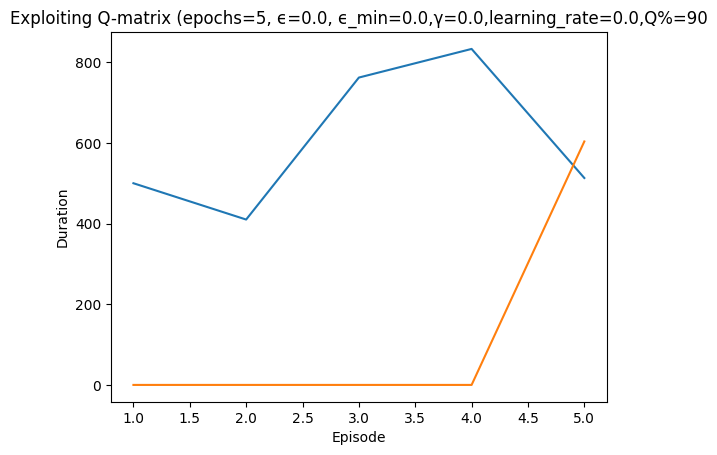

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [19]:
# Evaluate the Deep Q-learning agent
dql_run_200 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=200,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=200,iteration_count=4000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/200 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:   14.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   18.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   18.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 26|reward:   20.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 26|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 1|Iteration 67|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 1|Iteration 67|reward:  120.0|last_reward_at:   67|Elapsed Time: 0:00:00||
Episode 1|Iteration 70|reward:  134.0|last_reward_at:   67|Elapsed Time: 0:00:00||
Episod

  Episode 1 ended at t=1310 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/260 (0.04)
    explore-remote: 16/419 (0.04)
    explore-connect: 1/362 (0.00)
    exploit-local: 8/97 (0.08)
    exploit-remote: 0/15 (0.00)
    exploit-connect: 10/111 (0.08)
  exploit deflected to exploration: 12
  ## Episode: 2/200 'DQL' ϵ=0.7157, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 18|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 20|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 20|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 2|Iteration 23|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 2|It

  Episode 2 ended at t=197 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/20 (0.17)
    explore-remote: 16/39 (0.29)
    explore-connect: 0/58 (0.00)
    exploit-local: 14/12 (0.54)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 1
  ## Episode: 3/200 'DQL' ϵ=0.6919, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 ended at t=339 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/52 (0.09)
    explore-remote: 13/66 (0.16)
    explore-connect: 0/87 (0.00)
    exploit-local: 14/1 (0.93)
    exploit-remote: 4/19 (0.17)
    exploit-connect: 11/67 (0.14)
  exploit deflected to exploration: 1
  ## Episode: 4/200 'DQL' ϵ=0.6531, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Ite

  Episode 4 ended at t=161 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/30 (0.12)
    explore-remote: 10/21 (0.32)
    explore-connect: 0/34 (0.00)
    exploit-local: 14/4 (0.78)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 1
  ## Episode: 5/200 'DQL' ϵ=0.6356, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 13|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   16.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 5|Iteration 27|reward:   20.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 5|Iteration 27|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 5|Iteration 39|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 5|Iteration 50|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 5|Iteration 52|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 

  Episode 5 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 8/37 (0.18)
    explore-connect: 1/43 (0.02)
    exploit-local: 19/3 (0.86)
    exploit-remote: 3/16 (0.16)
    exploit-connect: 10/9 (0.53)
  exploit deflected to exploration: 0
  ## Episode: 6/200 'DQL' ϵ=0.6175, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iter

  Episode 6 ended at t=86 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 7/8 (0.47)
    explore-connect: 0/21 (0.00)
    exploit-local: 18/7 (0.72)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/200 'DQL' ϵ=0.6087, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 7|Iteration 13|reward:  136.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 7|Iteration 13|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 7|

  Episode 7 ended at t=119 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 9/28 (0.24)
    explore-connect: 0/27 (0.00)
    exploit-local: 18/3 (0.86)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 11
  ## Episode: 8/200 'DQL' ϵ=0.5967, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 10|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Itera

  Episode 8 ended at t=84 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 11/7 (0.61)
    explore-connect: 0/21 (0.00)
    exploit-local: 20/2 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/200 'DQL' ϵ=0.5884, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iterat

  Episode 9 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 14/9 (0.61)
    explore-connect: 0/13 (0.00)
    exploit-local: 17/1 (0.94)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/200 'DQL' ϵ=0.5804, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 12|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 10|Iteration 18|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 10|Iteration 18|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00

  Episode 10 ended at t=69 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 6/5 (0.55)
    explore-connect: 0/12 (0.00)
    exploit-local: 15/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 0
  ## Episode: 11/200 'DQL' ϵ=0.5738, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 11|Iteration 7|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 11 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 7/4 (0.64)
    explore-connect: 0/15 (0.00)
    exploit-local: 14/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 12/200 'DQL' ϵ=0.5685, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 12|Iteration 10|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 12 ended at t=93 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 6/14 (0.30)
    explore-connect: 2/17 (0.11)
    exploit-local: 13/2 (0.87)
    exploit-remote: 2/6 (0.25)
    exploit-connect: 9/8 (0.53)
  exploit deflected to exploration: 0
  ## Episode: 13/200 'DQL' ϵ=0.5599, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 9|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 13|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||
E

  Episode 13 ended at t=205 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/33 (0.08)
    explore-remote: 10/35 (0.22)
    explore-connect: 0/41 (0.00)
    exploit-local: 14/9 (0.61)
    exploit-remote: 6/43 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/200 'DQL' ϵ=0.5414, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 8|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 13|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 14|Iteration 14|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 14|Iteration 14|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 14|Iteration 22|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 14|Iteration 22|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00|

  Episode 14 ended at t=77 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/19 (0.14)
    explore-connect: 0/19 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 15/200 'DQL' ϵ=0.5347, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 9|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 15|Iteration 11|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 15|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Ep

  Episode 15 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 7/8 (0.47)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 16/200 'DQL' ϵ=0.5305, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:  238.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 16 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/11 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 17/200 'DQL' ϵ=0.5263, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 17 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 9/3 (0.75)
    explore-connect: 0/13 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/200 'DQL' ϵ=0.5212, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 10|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 18|Iteration 15|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 18|Iteration 15|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 18|Iteration 16|reward:  138.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 18|Iteration 16|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 18|Iteration 17|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00

  Episode 18 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 19/200 'DQL' ϵ=0.5169, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 19|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 19|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 19|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 19 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 20/200 'DQL' ϵ=0.5133, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 9|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 9|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 14|reward:  135.0|last_reward_at:   10|Elapsed Time: 0:00:00||
E

  Episode 20 ended at t=429 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/30 (0.06)
    explore-remote: 3/73 (0.04)
    explore-connect: 0/86 (0.00)
    exploit-local: 11/4 (0.73)
    exploit-remote: 3/200 (0.01)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 1
  ## Episode: 21/200 'DQL' ϵ=0.4793, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 21|Iteration 8|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 21|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 21|Iteration 10|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 21|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 21|Iteration 15|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 21|Iteration 15|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 21|Iteration 17|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 21|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00|

  Episode 21 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/7 (0.22)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/2 (0.85)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 22/200 'DQL' ϵ=0.4756, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 22|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 22 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/5 (0.00)
    exploit-local: 13/2 (0.87)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 23/200 'DQL' ϵ=0.4720, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 23|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 23|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 23|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 23|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 23 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 24/200 'DQL' ϵ=0.4693, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 24|Iteration 7|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 24 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/11 (0.00)
    exploit-local: 13/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 25/200 'DQL' ϵ=0.4658, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 25|Iteration 8|reward:  238.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 25 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 7/4 (0.64)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/200 'DQL' ϵ=0.4625, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 26|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 26 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 7/2 (0.78)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 27/200 'DQL' ϵ=0.4593, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 15|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 27|Iteration 18|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 27|Iteration 18|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 27|Iteration 19|reward:  134.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 27|Iteration 19|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00|

  Episode 27 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 5/6 (0.45)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 28/200 'DQL' ϵ=0.4557, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 28|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 28|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 28|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 28|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 28|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 28 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 29/200 'DQL' ϵ=0.4526, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 29|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 29|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 29|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 29 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 30/200 'DQL' ϵ=0.4502, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 30|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 30|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 30|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 30 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 7/2 (0.78)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/4 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 31/200 'DQL' ϵ=0.4467, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 31|Iteration 7|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 31 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 32/200 'DQL' ϵ=0.4441, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 32|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 32|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 32|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 32|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 32 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/200 'DQL' ϵ=0.4414, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 33|Iteration 8|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 33|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 33|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 33|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 33 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/200 'DQL' ϵ=0.4385, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 34|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 34|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 34|Iteration 11|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 34|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 34|Iteration 12|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||
E

  Episode 34 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/17 (0.00)
    exploit-local: 14/2 (0.88)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/200 'DQL' ϵ=0.4346, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 35|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 35|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 35|Iteration 8|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 35 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/200 'DQL' ϵ=0.4324, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 36|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 36 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/200 'DQL' ϵ=0.4304, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 37|Iteration 9|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 37|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 37 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/200 'DQL' ϵ=0.4283, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 38|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 38|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 8|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 38 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/200 'DQL' ϵ=0.4258, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 39|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 39|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 39 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 40/200 'DQL' ϵ=0.4229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 40|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 40|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 40|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 40 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 41/200 'DQL' ϵ=0.4209, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 7|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 41|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 41 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/4 (0.33)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/200 'DQL' ϵ=0.4187, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 42|Iteration 10|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 42|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 42 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/7 (0.00)
    exploit-local: 15/1 (0.94)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/200 'DQL' ϵ=0.4159, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 43|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 43 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 44/200 'DQL' ϵ=0.4140, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 44|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 44|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 44|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 44|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 44 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 45/200 'DQL' ϵ=0.4115, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 45|Iteration 7|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 45 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/200 'DQL' ϵ=0.4092, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 46|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 46|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 46|Iteration 10|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 46 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 47/200 'DQL' ϵ=0.4066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 47 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/200 'DQL' ϵ=0.4041, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 48|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 48|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 48 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/200 'DQL' ϵ=0.4019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 49 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/200 'DQL' ϵ=0.3996, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 7|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 50|Iteration 9|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 50 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 51/200 'DQL' ϵ=0.3973, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 51|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 51|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 51|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 51|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 51|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 51|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 51|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 51|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 51|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 51 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 52/200 'DQL' ϵ=0.3952, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 52|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 52|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 52|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 52|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 52|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 52|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 52|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 52|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 52|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 52|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 52|Iteration 7|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 52|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 52 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 6/4 (0.60)
    explore-connect: 0/7 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 53/200 'DQL' ϵ=0.3926, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 53|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 53|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 53|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 53|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 53|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 53|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 53|Iteration 8|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 53|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 53|Iteration 15|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 53|Iteration 26|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 53|Iteration 31|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 53|Iteration 31|reward:  120.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 53 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 54/200 'DQL' ϵ=0.3891, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 54|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 54|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 54|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 54|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 54|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 54|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 54|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 54 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 55/200 'DQL' ϵ=0.3872, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 55|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 55|Iteration 6|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 55|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 55|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 55|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 55|Iteration 8|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 55|Iteration 8|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 55|Iteration 9|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 55|Iteration 9|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 55 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 56/200 'DQL' ϵ=0.3850, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 56|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 8|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 56|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 56|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 56|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 56|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 56|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 56|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


  Episode 56 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 57/200 'DQL' ϵ=0.3828, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 57|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 57|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 57|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 57|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 57|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 57|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 57|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 57|Iteration 7|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 57|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 57|Iteration 8|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 57 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 5/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 58/200 'DQL' ϵ=0.3803, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 58|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 58|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 58|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 58|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 58|Iteration 8|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 58|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 58|Iteration 11|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 58|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 58|Iteration 12|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 58|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 58|Iteration 13|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 58|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00|

  Episode 58 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 5/8 (0.38)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/2 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 59/200 'DQL' ϵ=0.3777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 59|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 59|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 59|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 59|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 59|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 59|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 59|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 59|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 59|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 59|Iteration 9|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 59|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 59|Iteration 10|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 59 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 60/200 'DQL' ϵ=0.3757, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 60|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 60|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 60|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 60|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 60|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 60|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 60|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 60|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 60|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 60|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 60|Iteration 8|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 60|Iteration 10|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 60 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/2 (0.85)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 61/200 'DQL' ϵ=0.3736, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 61|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 61|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 61|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 61|Iteration 5|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 61|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 61|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 61|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 61|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 61|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 61|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 61|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 61|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 61 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 62/200 'DQL' ϵ=0.3716, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 62|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 62|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 62|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 62|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 62|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 62|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 62|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 62|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 62|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 62|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 62|Iteration 9|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 62|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 62 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 63/200 'DQL' ϵ=0.3696, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 63|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 63|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 63|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 63|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 63|Iteration 9|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 63|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 63|Iteration 10|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 63|Iteration 10|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 63|Iteration 11|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 63|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 12|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00|

  Episode 63 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 5/7 (0.42)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 64/200 'DQL' ϵ=0.3673, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 64|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 64|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 64|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 64|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 64|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 64|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 64|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 64|Iteration 5|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 64|Iteration 5|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 64|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 64|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 64|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 64 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 65/200 'DQL' ϵ=0.3655, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 65|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 65|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 65|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 65|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 65|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 65|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 65|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 65|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 65|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 65|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 65|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 65 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 66/200 'DQL' ϵ=0.3638, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 66|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 66|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 66|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 66|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 66|Iteration 8|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 66|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 66|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 66|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 66|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 66|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 66|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 66|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


  Episode 66 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/5 (0.17)
    explore-connect: 1/4 (0.20)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 67/200 'DQL' ϵ=0.3619, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 67|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 67|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 67|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 67|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 67|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 67|Iteration 10|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 67|Iteration 10|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 67|Iteration 12|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 67|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||


  Episode 67 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 68/200 'DQL' ϵ=0.3598, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 68|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 68|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 68|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 68|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 68|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 68|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 68|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 68|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 68|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 68 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 9/2 (0.82)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 69/200 'DQL' ϵ=0.3576, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 69|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 69|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 69|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 69|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 69|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 69|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 69|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 69|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 69|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 69|Iteration 10|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 69|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 69|Iteration 11|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||
E

  Episode 69 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 70/200 'DQL' ϵ=0.3558, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 70|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 70|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 70|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 70|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 70|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 70|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 70|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 70|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 70|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 70|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 70|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 70|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 70 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 71/200 'DQL' ϵ=0.3538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 71|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 71|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 71|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 71|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 71|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 71|Iteration 8|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 71|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 71|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 71|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 71|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 71 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 72/200 'DQL' ϵ=0.3519, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 72|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 72|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 72|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 72|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 72|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 72|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 72|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 72|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 72|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 72|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 72|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 72|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 72 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 73/200 'DQL' ϵ=0.3504, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 73|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 73|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 73|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 73|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 73|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 73|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 73|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 73|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 73|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 73|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 73 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 74/200 'DQL' ϵ=0.3486, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 74|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 74|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 74|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 74|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 74|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 74|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 74|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 74|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 74|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 74|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 74|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 74|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 74 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 75/200 'DQL' ϵ=0.3468, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 75|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 75|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 75|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 75|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 75|Iteration 8|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 75|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 75|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 75|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 75|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 75|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


  Episode 75 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 76/200 'DQL' ϵ=0.3452, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 76|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 76|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 76|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 76|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 76|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 76|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 76|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 76|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 76|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 76|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 76|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 76|Iteration 9|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 76 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 77/200 'DQL' ϵ=0.3438, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 77|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 77|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 77|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 77|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 77|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 77|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 77|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 77|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 77|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 77|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 77|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 77|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 77 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 1/6 (0.14)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 78/200 'DQL' ϵ=0.3420, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 78|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 78|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 78|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 78|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 78|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 78|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 78|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 78|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 78|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 78|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 78|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 78|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 78 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 79/200 'DQL' ϵ=0.3403, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 79|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 79|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 79|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 79|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 79|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 79|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 79|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 79|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 79|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 79 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 80/200 'DQL' ϵ=0.3390, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 80|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 80|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 80|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 80|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 80|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 80|Iteration 8|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 80|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 80|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 80|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 80 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 81/200 'DQL' ϵ=0.3371, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 81|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 81|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 81|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 81|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 81|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 81|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 81|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 81|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 81|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 81|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 81|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 81|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 81 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 9/3 (0.75)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 82/200 'DQL' ϵ=0.3351, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 82|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 82|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 82|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 82|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 82|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 82|Iteration 10|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 82|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 82 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 83/200 'DQL' ϵ=0.3330, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 83|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 83|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 83|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 83|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 83|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 83|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 83|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 83|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 83|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 83 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 84/200 'DQL' ϵ=0.3316, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 84|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 84|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 84|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 84|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 84|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 84|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 84|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 8|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 84 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 85/200 'DQL' ϵ=0.3300, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 85|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 85|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 85|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 85|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 85|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 85|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 85|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 85|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 85|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 85|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 85|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 85|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 85 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 86/200 'DQL' ϵ=0.3285, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 86|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 86|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 86|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 86|Iteration 6|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 86|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 86|Iteration 9|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 86|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 86|Iteration 10|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 86|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 86 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 87/200 'DQL' ϵ=0.3268, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 87|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 87|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 87|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 87|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 87|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 87|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 87|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 87|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 87|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 87|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 87|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 87|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 87 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 88/200 'DQL' ϵ=0.3254, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 88|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 88|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 88|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 88|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 88|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 88|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 88|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 88|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 88|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 88|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 88|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 88|Iteration 8|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 88 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 89/200 'DQL' ϵ=0.3239, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 89|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 89|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 89|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 89|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 89|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 89|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 89|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 89|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 89|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 89|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 89|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 89|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 89 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 90/200 'DQL' ϵ=0.3223, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 90|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 90|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 90|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 90|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 90|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 90|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 90|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 90|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 90|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 8|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 90|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 90 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 91/200 'DQL' ϵ=0.3210, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 91|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 91|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 91|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 91|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 91|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 91|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 91|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 91|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 91|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 91|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 91|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 91|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 91 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 92/200 'DQL' ϵ=0.3195, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 92|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 92|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 92|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 92|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 92|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 92|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 92|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 92|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 92|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 92|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 92|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 92 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 93/200 'DQL' ϵ=0.3183, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 93|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 93|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 93|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 93|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 93|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 93|Iteration 8|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 93|Iteration 8|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 93 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 94/200 'DQL' ϵ=0.3168, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 94|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 94|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 94|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 94|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 94|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 94|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 94|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 94|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 94|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 94|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 94 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 95/200 'DQL' ϵ=0.3152, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 95|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 95|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 95|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 95|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 95|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 95|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 95|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 95|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 95|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 95|Iteration 7|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 95|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 95|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 95 ended at t=157 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 15/16 (0.48)
    explore-connect: 0/30 (0.00)
    exploit-local: 18/46 (0.28)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 20
  ## Episode: 96/200 'DQL' ϵ=0.3086, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 96|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 96|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 96|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 96|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 96|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 96|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 96|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 96|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 96|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 96|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 96|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 96 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 97/200 'DQL' ϵ=0.3076, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 97|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 97|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 97|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 97|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 97|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 97|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 97|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 97|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 97|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 97|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 97|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 97|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 97 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 98/200 'DQL' ϵ=0.3066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 98|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 98|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 98|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 98|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 98|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 98|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 98|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 98|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 98|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 98 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 99/200 'DQL' ϵ=0.3053, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 99|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 99|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 99|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 99|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 99|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 99|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 99|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 99|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 99|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 99|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 99|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 99|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 99 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 100/200 'DQL' ϵ=0.3042, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 100|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 100|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 100|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 100|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 100|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 100|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 100|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 100|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 100|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 100|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 100 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 101/200 'DQL' ϵ=0.3028, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 101|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 101|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 101|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 101|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 101|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 101|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 101|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 101|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 101|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 101|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 101|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 101|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 101 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 102/200 'DQL' ϵ=0.3017, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 102|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 102|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 102|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 102|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 102|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 102|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 102|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 102|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 102|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 102|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 102 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 103/200 'DQL' ϵ=0.3006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 103|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 103|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 103|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 103|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 103|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 103|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 103|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 103|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 103|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 103|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 103|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 103|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 103 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 104/200 'DQL' ϵ=0.2994, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 104|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 104|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 104|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 104|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 104|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 104|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 104|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 104|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 104|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 104|Iteration 6|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 104|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 104|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 104 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/3 (0.00)
    exploit-local: 15/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 105/200 'DQL' ϵ=0.2979, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 105|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 105|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 105|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 105|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 105|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 105|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 105|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 105|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 105|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 105 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 106/200 'DQL' ϵ=0.2966, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 106|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 106|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 106|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 106|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 106|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 106|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 106|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 106|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 106|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 106|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 106|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 106|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 106 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 107/200 'DQL' ϵ=0.2955, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 107|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 107|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 107|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 107|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 107|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 107|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 107|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 107|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 107|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 107|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 107|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 107|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 107 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 108/200 'DQL' ϵ=0.2943, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 108|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 108|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 108|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 108|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 108|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 108|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 108|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 108|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 108|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 108|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 108|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 108|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 108 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 109/200 'DQL' ϵ=0.2929, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 109|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 109|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 109|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 109|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 109|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 109|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 109|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 109|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 109|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 109|Iteration 7|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 109 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 110/200 'DQL' ϵ=0.2916, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 110|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 110|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 110|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 110|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 110|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 110|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 110|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 110|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 110|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 110|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 110 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 111/200 'DQL' ϵ=0.2905, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 111|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 111|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 111|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 111|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 111|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 111|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 111|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 111|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 111|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 111|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 111|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 10|reward:  342.0|last_reward_at:    5|Elapsed Time: 0

  Episode 111 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 112/200 'DQL' ϵ=0.2893, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 112|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 112|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 112|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 112|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 112|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 112|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 112|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 112|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 112|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 112|Iteration 8|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 112 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 113/200 'DQL' ϵ=0.2880, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 113|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 113|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 113|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 113|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 113|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 113|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 113|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 113|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 113|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 113 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 114/200 'DQL' ϵ=0.2869, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 114|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 114|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 114|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 114|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 114|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 114|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 114|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 114|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 114|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 114|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 114|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 114|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 114 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 115/200 'DQL' ϵ=0.2859, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 115|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 115|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 115|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 115|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 115|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 115|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 115|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 115|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 115|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 115|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 115|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 115|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 115 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 116/200 'DQL' ϵ=0.2847, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 116|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 116|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 116|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 116|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 116|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 116|Iteration 8|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 116|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 116|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 116|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 116|Iteration 10|reward:  342.0|last_reward_at:    9|Elapsed Time: 0

  Episode 116 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 117/200 'DQL' ϵ=0.2835, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 117|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 117|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 117|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 117|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 117|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 117|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 117|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 117|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 117|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 117|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 117 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 118/200 'DQL' ϵ=0.2824, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 118|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 118|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 118|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 118|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 118|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 118|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 118|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 118|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 118|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 118 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 119/200 'DQL' ϵ=0.2815, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 119|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 119|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 119|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 119|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 119|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 119|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 119|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 119|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 119|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 119|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 119|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 119|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 119 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 120/200 'DQL' ϵ=0.2805, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 120|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 120|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 120|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 120|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 120|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 120|Iteration 9|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 120|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:

  Episode 120 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 121/200 'DQL' ϵ=0.2792, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 121|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 121|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 121|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 121|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 121|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 121|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 121|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 121|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 121|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 121|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 121|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 121|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 121 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 122/200 'DQL' ϵ=0.2781, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 122|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 122|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 122|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 122|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 122|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 122|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 122|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 122|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 122|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 122|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 122 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 123/200 'DQL' ϵ=0.2770, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 123|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 123|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 123|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 123|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 123|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 123|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 123|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 123|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 123|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:

  Episode 123 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 124/200 'DQL' ϵ=0.2760, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 124|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 124|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 124|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 124|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 124|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 124|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 124|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 124|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 124|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 124|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 124 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 125/200 'DQL' ϵ=0.2748, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 125|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 125|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 125|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 125|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 125|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 125|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 125|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 125|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 125|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 125|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 125 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 126/200 'DQL' ϵ=0.2738, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 126|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 126|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 126|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 126|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 126|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 126|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 126|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 126|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 126|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 126|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 126|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 126|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 126 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 127/200 'DQL' ϵ=0.2730, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 127|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 127|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 127|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 127|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 127|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 127|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 127|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 127|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 127|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 127|Iteration 6|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 127|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 127|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 127 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 128/200 'DQL' ϵ=0.2720, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 128|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 128|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 128|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 128|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 128|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 128|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 128|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 128|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 128|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 128|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 128|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 128|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 128 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 129/200 'DQL' ϵ=0.2710, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 129|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 129|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 129|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 129|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 129|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 129|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 129|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 129|Iteration 6|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 129|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 129|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 129 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 130/200 'DQL' ϵ=0.2700, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 130|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 130|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 130|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 130|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 130|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 130|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 130|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 130|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 130|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 130 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 131/200 'DQL' ϵ=0.2690, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 131|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 131|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 131|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 131|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 131|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 131|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 131|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 131|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 131|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:

  Episode 131 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/12 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 132/200 'DQL' ϵ=0.2676, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 132|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 132|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 132|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 132|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 132|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 132|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 132|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 132|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 132|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 132 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 1/1 (0.50)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 133/200 'DQL' ϵ=0.2667, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 133|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 133|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 133|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 133|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 133|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 133|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 133|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 133|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 133|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 133|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 133|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 133|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 133 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 5/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 134/200 'DQL' ϵ=0.2656, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 134|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 134|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 134|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 134|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 134|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 134|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 134|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 134|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 134|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 134|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 134 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 135/200 'DQL' ϵ=0.2646, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 135|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 135|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 135|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 135|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 135|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 135|Iteration 3|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 135|Iteration 3|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 135|Iteration 6|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 135|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 135|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 135|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 9|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 135 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 136/200 'DQL' ϵ=0.2635, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 136|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 136|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 136|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 136|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 136|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 136|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 136|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 136|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 136|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 136|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 136|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 136|Iteration 9|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 136 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 137/200 'DQL' ϵ=0.2624, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 137|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 137|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 137|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 137|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 137|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 137|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 137|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 137|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 137|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 137|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 137|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 137|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 137 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 138/200 'DQL' ϵ=0.2614, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 138|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 138|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 138|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 138|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 138|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 138|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 138|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 138|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 138|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 138|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 138|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 138|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 138 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 139/200 'DQL' ϵ=0.2606, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 139|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 139|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 139|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 139|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 139|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 139|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 139|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 139|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 139|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 139|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 139|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 139|Iteration 8|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 139 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 140/200 'DQL' ϵ=0.2597, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 140|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 140|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 140|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 140|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 140|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 140|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 140|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 140|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 140|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 140|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 140|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 140|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 140 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 141/200 'DQL' ϵ=0.2589, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 141|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 141|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 141|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 141|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 141|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 141|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 141|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 141|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 141|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 141|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 141|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 141|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 141 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 142/200 'DQL' ϵ=0.2580, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 142|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 142|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 142|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 142|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 142|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 142|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 142|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 142|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 142|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 142|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 142|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 142|Iteration 8|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 142 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 143/200 'DQL' ϵ=0.2571, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 143|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 143|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 143|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 143|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 143|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 143|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 143|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 143|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 143|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 143|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 143|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 143|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 143 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 144/200 'DQL' ϵ=0.2563, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 144|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 144|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 144|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 144|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 144|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 144|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 144|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 144|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 144|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 144|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 144|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 144|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 144 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 145/200 'DQL' ϵ=0.2554, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 145|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 145|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 145|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 145|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 145|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 145|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 145|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 145|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 145|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 145|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 145 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 146/200 'DQL' ϵ=0.2545, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 146|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 146|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 146|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 146|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 146|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 146|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 146|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 146|Iteration 9|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 146|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:

  Episode 146 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 147/200 'DQL' ϵ=0.2534, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 147|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 147|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 147|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 147|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 147|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 147|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 147|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 147|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 147|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:

  Episode 147 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 148/200 'DQL' ϵ=0.2525, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 148|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 148|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 148|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 148|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 148|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 148|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 148|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 148|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 148|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 148 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 149/200 'DQL' ϵ=0.2516, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 149|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 149|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 149|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 149|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 149|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 149|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 149|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 149|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 149|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 149|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 149|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 149|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 149 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 150/200 'DQL' ϵ=0.2505, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 150|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 150|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 150|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 150|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 150|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 150|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 150|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 150|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 150|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 150|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 150 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/1 (0.75)
    explore-connect: 1/3 (0.25)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 151/200 'DQL' ϵ=0.2496, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 151|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 151|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 151|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 151|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 151|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 151|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 151|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 151|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 151|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 151|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 151|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 151|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 151 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 152/200 'DQL' ϵ=0.2488, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 152|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 152|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 152|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 152|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 152|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 152|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 152|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 152|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 152|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 152|Iteration 9|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 152 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 153/200 'DQL' ϵ=0.2479, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 153|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 153|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 153|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 153|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 153|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 153|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 153|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 153|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 153|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 153|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 153|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 153|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 153 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 154/200 'DQL' ϵ=0.2469, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 154|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 154|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 154|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 154|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 154|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 154|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 154|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 154|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 154|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 154|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 154|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 154|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 154 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 5/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 155/200 'DQL' ϵ=0.2461, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 155|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 155|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 155|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 155|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 155|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 155|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 155|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 155|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 155|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 155|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 155|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 155|Iteration 10|reward:  342.0|last_reward_at:    7|Elapsed Time: 0

  Episode 155 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 156/200 'DQL' ϵ=0.2452, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 156|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 156|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 156|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 156|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 156|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 156|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 156|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 156|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 156|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 156|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 156|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 156|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 156 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 157/200 'DQL' ϵ=0.2445, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 157|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 157|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 157|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 157|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 157|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 157|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 157|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 157|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 157|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 157|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 157 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 158/200 'DQL' ϵ=0.2436, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 158|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 158|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 158|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 158|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 158|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 158|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 158|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 158|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 158|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 158|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 158|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 158|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 158 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 159/200 'DQL' ϵ=0.2427, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 159|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 159|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 159|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 159|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 159|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 159|Iteration 6|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 159|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 159|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 159|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 159 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 160/200 'DQL' ϵ=0.2420, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 160|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 160|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 160|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 160|Iteration 6|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 160|Iteration 11|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 160|Iteration 12|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 160|Iteration 12|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 160|Iteration 13|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 160|Iteration 13|reward:  128.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 160|Iteration 15|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 160|Iteration 15|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 160|Iteration 16|reward:  230.0|last_reward_at:   15|Elapsed 

  Episode 160 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 161/200 'DQL' ϵ=0.2409, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 161|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 161|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 161|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 161|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 161|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 161|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 161|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 161|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 161|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:

  Episode 161 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 162/200 'DQL' ϵ=0.2399, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 162|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 162|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 162|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 162|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 162|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 162|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 162|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 162|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 162|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 162|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 162|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 162|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 162 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 163/200 'DQL' ϵ=0.2392, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 163|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 163|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 163|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 163|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 163|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 163|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 163|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 163|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 163|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 163|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 163|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 163|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 163 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 164/200 'DQL' ϵ=0.2384, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 164|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 164|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 164|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 164|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 164|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 164|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 164|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 164|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 164|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 164 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 165/200 'DQL' ϵ=0.2377, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 165|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 165|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 165|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 165|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 165|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 165|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 165|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 165|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 165|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 165|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 165|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 165|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 165 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 166/200 'DQL' ϵ=0.2369, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 166|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 166|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 166|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 166|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 166|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 166|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 166|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 166|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 166|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 166|Iteration 7|reward:  238.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 166 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 167/200 'DQL' ϵ=0.2361, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 167|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 167|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 167|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 167|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 167|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 167|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 167|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 167|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 167|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 167|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 167|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 167|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 167 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 168/200 'DQL' ϵ=0.2353, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 168|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 168|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 168|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 168|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 168|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 168|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 168|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 168|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 168|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 168 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/7 (0.00)
    exploit-local: 18/6 (0.75)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 169/200 'DQL' ϵ=0.2338, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 169|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 169|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 169|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 169|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 169|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 169|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 169|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 169|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 169|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 169|Iteration 6|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 169|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 169|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 169 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 10/3 (0.77)
    explore-connect: 0/10 (0.00)
    exploit-local: 19/5 (0.79)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 16
  ## Episode: 170/200 'DQL' ϵ=0.2321, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 170|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 170|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 170|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 170|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 170|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 170|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 170|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 170|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 170|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 170|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 170|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 170|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 170 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 171/200 'DQL' ϵ=0.2314, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 171|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 171|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 171|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 171|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 171|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 171|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 171|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 171|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 171|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 171|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 171|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 171|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 171 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 172/200 'DQL' ϵ=0.2306, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 172|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 172|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 172|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 172|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 172|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 172|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 172|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 172|Iteration 7|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 172|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 172 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 173/200 'DQL' ϵ=0.2298, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 173|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 173|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 173|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 173|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 173|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 173|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 173|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 173|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 173|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 173|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 173 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 174/200 'DQL' ϵ=0.2291, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 174|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 174|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 174|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 174|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 174|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 174|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 174|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 174|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 174|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 174|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 174|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 174|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 174 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 1/6 (0.14)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 175/200 'DQL' ϵ=0.2284, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 175|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 175|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 175|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 175|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 175|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 175|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 175|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 175|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 175|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 175|Iteration 9|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 175|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 175|Iteration 10|reward:  342.0|last_reward_at:    9|Elapsed Time: 0

  Episode 175 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 176/200 'DQL' ϵ=0.2276, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 176|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 176|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 176|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 176|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 176|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 176|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 176|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 176|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 176|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 176|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 176|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 176|Iteration 11|reward:  342.0|last_reward_at:    7|Elapsed Time: 0

  Episode 176 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 177/200 'DQL' ϵ=0.2269, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 177|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 177|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 177|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 177|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 177|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 177|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 177|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 177|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 177|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 177|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 177|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 177|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 177 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 178/200 'DQL' ϵ=0.2262, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 178|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 178|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 178|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 178|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 178|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 178|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 178|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 178|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 178|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 178|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 178|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 178|Iteration 7|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 178 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 179/200 'DQL' ϵ=0.2255, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 179|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 179|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 179|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 179|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 179|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 179|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 179|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 179|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 179|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 179|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 179 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 180/200 'DQL' ϵ=0.2248, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 180|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 180|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 180|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 180|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 180|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 180|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 180|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 180|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 180|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 180|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 180|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 180|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 180 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 181/200 'DQL' ϵ=0.2241, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 181|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 181|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 181|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 181|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 181|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 181|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 181|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 181|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 181|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 181|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 181|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 181|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 181 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 182/200 'DQL' ϵ=0.2234, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 182|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 182|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 182|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 182|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 182|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 182|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 182|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 182|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 182|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 182|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 182|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 182|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 182 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 183/200 'DQL' ϵ=0.2227, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 183|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 183|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 183|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 183|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 183|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 183|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 183|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 183|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 183|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 183|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 183|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 183|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 183 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 184/200 'DQL' ϵ=0.2220, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 184|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 184|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 184|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 184|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 184|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 184|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 184|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 184|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 184|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 184|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 184|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 184|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 184 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 185/200 'DQL' ϵ=0.2213, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 185|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 185|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 185|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 185|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 185|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 185|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 185|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 185|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 185|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 185|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 185|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 185|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 185 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 186/200 'DQL' ϵ=0.2207, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 186|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 186|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 186|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 186|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 186|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 186|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 186|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 186|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 186|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 186|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 186|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 186|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 186 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 187/200 'DQL' ϵ=0.2201, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 187|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 187|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 187|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 187|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 187|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 187|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 187|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 187|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 187|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 187|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 187|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 187|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 187 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 188/200 'DQL' ϵ=0.2194, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 188|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 188|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 188|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 188|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 188|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 188|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 188|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 188|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 188|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 188 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 189/200 'DQL' ϵ=0.2188, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 189|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 189|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 189|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 189|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 189|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 189|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 189|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 189|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 189|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 189|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 189|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 189|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 189 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 190/200 'DQL' ϵ=0.2180, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 190|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 190|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 190|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 190|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 190|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 190|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 190|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 190|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 190|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 190|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 190|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 190|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 190 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 191/200 'DQL' ϵ=0.2174, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 191|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 191|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 191|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 191|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 191|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 191|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 191|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 191|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 191|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 191|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 191|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 191|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 191 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 192/200 'DQL' ϵ=0.2167, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 192|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 192|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 192|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 192|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 192|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 192|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 192|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 192|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 192|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 192|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 192|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 192|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 192 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 193/200 'DQL' ϵ=0.2161, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 193|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 193|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 193|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 193|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 193|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 193|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 193|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 193|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 193|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 193|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 193|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 193|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 193 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 194/200 'DQL' ϵ=0.2154, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 194|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 194|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 194|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 194|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 194|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 194|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 194|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 194|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 194|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 194|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 194|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 194|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 194 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 195/200 'DQL' ϵ=0.2148, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 195|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 195|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 195|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 195|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 195|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 195|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 195|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 195|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 195|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 195|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 195 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 196/200 'DQL' ϵ=0.2140, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 196|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 196|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 196|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 196|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 196|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 196|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 196|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 196|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 196|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 196|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 196|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 196|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 196 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 197/200 'DQL' ϵ=0.2134, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 197|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 197|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 197|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 197|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 197|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 197|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 197|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 197|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 197|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 197|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 197|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 197|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:

  Episode 197 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 198/200 'DQL' ϵ=0.2128, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 198|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 198|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 198|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 198|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 198|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 198|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 198|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 198|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 198|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 198|Iteration 8|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 198|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 198|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:

  Episode 198 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 199/200 'DQL' ϵ=0.2121, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 199|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 199|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 199|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 199|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 199|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 199|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 199|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 199|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 199|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 199|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:

  Episode 199 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 200/200 'DQL' ϵ=0.2115, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 200|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 200|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 200|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 200|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 200|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 200|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 200|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 200|Iteration 6|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 200|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 200|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 200|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 200|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:

  Episode 200 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [18]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=50,iteration_count=4000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 91|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 129|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 129|reward:  120.0|last_reward_at:  129|Elapsed Time: 0:00:00||
Episode 

  Episode 1 ended at t=1004 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/193 (0.04)
    explore-remote: 18/327 (0.05)
    explore-connect: 3/315 (0.01)
    exploit-local: 12/36 (0.25)
    exploit-remote: 0/22 (0.00)
    exploit-connect: 8/61 (0.12)
  exploit deflected to exploration: 18
  ## Episode: 2/50 'DQL' ϵ=0.7546, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iter

  Episode 2 ended at t=112 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/20 (0.17)
    explore-remote: 9/23 (0.28)
    explore-connect: 0/27 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/50 'DQL' ϵ=0.7401, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 13|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 3|Iteration 16|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 3|Iteration 16|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 3|Iteration 17|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode

  Episode 3 ended at t=119 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 14/30 (0.32)
    explore-connect: 2/21 (0.09)
    exploit-local: 18/5 (0.78)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 9/2 (0.82)
  exploit deflected to exploration: 5
  ## Episode: 4/50 'DQL' ϵ=0.7250, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 19|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 19|reward:  132.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 4|Iteration 20|reward:  140.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 4|Iteration 20|reward:  140.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 

  Episode 4 ended at t=121 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/15 (0.17)
    explore-remote: 13/32 (0.29)
    explore-connect: 0/26 (0.00)
    exploit-local: 17/3 (0.85)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 5/50 'DQL' ϵ=0.7101, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 13|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|I

  Episode 5 ended at t=109 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 10/14 (0.42)
    explore-connect: 0/30 (0.00)
    exploit-local: 19/3 (0.86)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/50 'DQL' ϵ=0.6969, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iteration 13|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iteration 13|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 6|Iteration 14|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 6|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 6|

  Episode 6 ended at t=50 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 5/10 (0.33)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/50 'DQL' ϵ=0.6910, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iterat

  Episode 7 ended at t=102 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/19 (0.00)
    explore-remote: 10/11 (0.48)
    explore-connect: 0/27 (0.00)
    exploit-local: 17/2 (0.89)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 8/50 'DQL' ϵ=0.6791, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iterat

  Episode 8 ended at t=108 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/20 (0.09)
    explore-remote: 8/18 (0.31)
    explore-connect: 0/25 (0.00)
    exploit-local: 15/3 (0.83)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 9/50 'DQL' ϵ=0.6667, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 9|Iter

  Episode 9 ended at t=155 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/29 (0.06)
    explore-remote: 8/20 (0.29)
    explore-connect: 0/43 (0.00)
    exploit-local: 17/3 (0.85)
    exploit-remote: 1/19 (0.05)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.6494, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 21|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 21|reward:  118.0|last_reward_at:   21|Elapsed Time: 0:00:00||


  Episode 10 ended at t=161 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/21 (0.12)
    explore-remote: 10/36 (0.22)
    explore-connect: 1/43 (0.02)
    exploit-local: 15/2 (0.88)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/20 (0.33)
  exploit deflected to exploration: 11
  ## Episode: 11/50 'DQL' ϵ=0.6320, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 12|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 11|Iteration 18|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 11|Iteration 18|reward:  134.0|last_reward_at:   18|Elapsed Time: 0:00:00|

  Episode 11 ended at t=105 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/15 (0.17)
    explore-remote: 10/14 (0.42)
    explore-connect: 0/27 (0.00)
    exploit-local: 15/6 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.6209, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 13|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 19|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 22|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 22|reward:   16.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 12|Iteration 30|reward:  116.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 12|Iteration 30|reward:  116.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 12|Iteration 32|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 12|Iteration 32|reward:  130.0|last_reward_at:   32|Elapsed Time: 0:00:0

  Episode 12 ended at t=124 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/22 (0.15)
    explore-remote: 10/24 (0.29)
    explore-connect: 0/33 (0.00)
    exploit-local: 13/7 (0.65)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.6082, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 13 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 1
  ## Episode: 14/50 'DQL' ϵ=0.6019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 9|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 14|Iteration 11|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 14|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Ep

  Episode 14 ended at t=77 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 8/8 (0.50)
    explore-connect: 0/19 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.5942, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 15|Iteration 9|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 15 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/9 (0.25)
    explore-remote: 8/6 (0.57)
    explore-connect: 0/12 (0.00)
    exploit-local: 14/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.5879, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 16|Iteration 7|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 16|Iteration 7|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 16 ended at t=70 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 6/7 (0.46)
    explore-connect: 0/11 (0.00)
    exploit-local: 12/4 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.5811, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 8|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 17 ended at t=73 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 8/11 (0.42)
    explore-connect: 1/20 (0.05)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/2 (0.83)
  exploit deflected to exploration: 1
  ## Episode: 18/50 'DQL' ϵ=0.5741, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:  236.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  250.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 18 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/14 (0.00)
    exploit-local: 11/5 (0.69)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.5688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 6|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 19|Iteration 8|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 19|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 19|Iteration 12|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 19|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||


  Episode 19 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 9/11 (0.45)
    explore-connect: 1/16 (0.06)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.5627, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 20 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 6/10 (0.38)
    explore-connect: 0/11 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'DQL' ϵ=0.5571, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 21|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 21|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 21|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 21|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 21|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 21|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 21|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 21|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 21|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 21 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'DQL' ϵ=0.5536, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 22|Iteration 10|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 22|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 22|Iteration 12|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 22|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||


  Episode 22 ended at t=55 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/18 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.5486, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 23|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 23|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 23|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 23|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 23|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 23|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 23|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 23 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 9/3 (0.75)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'DQL' ϵ=0.5441, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 24|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 24|Iteration 8|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 24|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 24|Iteration 9|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 24|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 24 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 8/6 (0.57)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 25|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 25|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 25|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 25 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.5357, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 26|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 26|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 26 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.5319, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:  236.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 6|reward:  250.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 27 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/6 (0.45)
    explore-remote: 10/4 (0.71)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/3 (0.79)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.5268, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 6|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 28|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 28|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 28|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 28|Iteration 10|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 28|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 28|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 28|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 28|Iteration 13|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 28 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/12 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.5223, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 29|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 29 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.5183, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 9|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 30|Iteration 11|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 30|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 30|Iteration 20|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 30|Iteration 28|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 30|Iteration 35|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 30 ended at t=492 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/48 (0.04)
    explore-remote: 5/96 (0.05)
    explore-connect: 1/103 (0.01)
    exploit-local: 10/69 (0.13)
    exploit-remote: 2/69 (0.03)
    exploit-connect: 10/77 (0.11)
  exploit deflected to exploration: 7
  ## Episode: 31/50 'DQL' ϵ=0.4791, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 31|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 31|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 6|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 31|Iteration 6|reward:  131.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 31|Iteration 8|reward:  140.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 31|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 31|Iteration 10|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 31 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 1
  ## Episode: 32/50 'DQL' ϵ=0.4758, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 32|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 32|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 32|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 32|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 32|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 32|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 32 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 6/5 (0.55)
    explore-connect: 0/10 (0.00)
    exploit-local: 13/1 (0.93)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.4715, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 33|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 33|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 33|Iteration 10|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 33 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.4681, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 34|Iteration 6|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 34|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 34|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 34|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 34|Iteration 8|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 34|Iteration 8|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 34|Iteration 11|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 34 ended at t=54 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.4642, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 35|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 35|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 7|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 35|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 35|Iteration 10|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 35 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 6/4 (0.60)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.4610, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 36|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 36|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 36|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 36|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 36 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.4576, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 37|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 37|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 37|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 37 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.4543, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 38|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 38|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 38|Iteration 10|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 38|Iteration 10|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 38 ended at t=208 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/26 (0.16)
    explore-remote: 4/36 (0.10)
    explore-connect: 0/29 (0.00)
    exploit-local: 11/34 (0.24)
    exploit-remote: 8/40 (0.17)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.4399, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 39|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 39|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 39|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 39|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 39|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 39 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/4 (0.33)
    explore-connect: 0/7 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.4372, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 40|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 40|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 40 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/4 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.4351, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 41|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 41|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 41 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.4328, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 42|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 42 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.4307, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 43|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 43|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 43|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 43|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 43 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/0 (1.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.4283, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 44|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 44|Iteration 13|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 44|Iteration 13|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 44|Iteration 14|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 44|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||


  Episode 44 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.4256, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 8|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 45|Iteration 11|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 45|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Ep

  Episode 45 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.4229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 46|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 46|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 46|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epis

  Episode 46 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.4205, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 47|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 47|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 47 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.4181, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 48|Iteration 8|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 48|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 48|Iteration 9|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 48|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 48|Iteration 10|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 48|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 48 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/6 (0.25)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.4155, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 49|Iteration 9|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 49|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 49|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 49|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 49 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.4130, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 50|Iteration 10|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 50 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=4000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [13]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=5,iteration_count=4000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 36|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 36|reward:   20.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 1|Iteration 42|reward:  120.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 1|Iteration 42|reward:  120.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 1|Iteration 49|reward:  131.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 1|Iteration 49|reward:  131.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 1|

  Episode 1 stopped at t=4000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/1107 (0.01)
    explore-remote: 14/1446 (0.01)
    explore-connect: 6/1414 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 31|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 31|reward:   20.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 2|Iteration 55|reward:  120.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 2|Iteration 55|reward:  120.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 2|Iteration 63|reward:  134.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 2|Iteration 63|reward:  134.0|last_reward_at:   63|Elapsed Time: 0:00:00||
Episode 2|

  Episode 2 stopped at t=4000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/1065 (0.01)
    explore-remote: 14/1442 (0.01)
    explore-connect: 6/1460 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 27|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 27|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 3|Iteration 34|reward:  134.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 3|Iteration 34|reward:  134.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 stopped at t=4000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/1078 (0.01)
    explore-remote: 16/1431 (0.01)
    explore-connect: 7/1453 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 26|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 26|reward:  116.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 4|Iteration 29|reward:  118.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 4|Iteration 29|reward:  118.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 4|Iteration 32|reward:  132.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 4|Iteration 32|reward:  132.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 stopped at t=4000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/1105 (0.01)
    explore-remote: 14/1405 (0.01)
    explore-connect: 6/1457 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 69|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 69|reward:  120.0|last_reward_at:   69|Elapsed Time: 0:00:00||
Episode 5|Iteration 73|reward:  134.0|last_reward_at:   69|Elapsed Time: 0:00:00||
Episode 5|Iteration 73|reward:  134.0|last_reward_at:   73|Elapsed Time: 0:00:00||
Episode 5|

  Episode 5 stopped at t=4000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/1076 (0.01)
    explore-remote: 14/1452 (0.01)
    explore-connect: 6/1439 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


In [20]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

wrapped_env = AgentWrapper(gym_env,
                           ActionTrackingStateAugmentation(ep, gym_env.reset()))

learners = {'dql for 50 episodes': dql_run['learner'], 'dql for 200 episodes': dql_run_200['learner']}
 #copy.deepcopy(dql_exploit_run['learner'])
obs = []
h = []
n = 20 
iters_steps = 1000

render = True
for name, learner_m in learners.items():
    rewards = []
    for i_episode in range(n):
        observation = wrapped_env.reset()
        #learner.new_episode()
        obs.append(observation['action_mask']['local_vulnerability'])
        a = observation['action_mask']
        total_reward = 0

        for t in range(iters_steps):
            action_style, gym_action, action_metadata  = learner_m.exploit(wrapped_env, observation) ## gym action
            if render and i_episode == n-1: print(gym_action)
            if not gym_action:
                _, gym_action, action_metadata = learner_m.explore(wrapped_env)

            observation, reward, done, info = wrapped_env.step(gym_action)

            #print(info)
            #learner.on_step(wrapped_env, observation, reward, done, info, action_metadata)
            #learner.end_of_iteration(t, done)

            total_reward += reward

            h.append((gym_env.get_explored_network_node_properties_bitmap_as_numpy(observation), gym_action))
            #print(h[-1])
            if gym_action is None:
                break

            if render and i_episode == n-1 and reward>0:
                print('####### rewarded action: {action}')
                print(f'total_reward={total_reward} reward={reward}')
                wrapped_env.render()

            if done:  ####### If AttackerGoal is not NONE or all 0
                print("Episode finished after {} timesteps".format(t+1))
                break
        rewards += [total_reward]

        if render and i_episode == n-1: wrapped_env.render()

    wrapped_env.close()
    plt.plot(rewards, label=name)
print("simulation ended")

plt.title("Chain: 12 nodes\nRewards for each episode (max 1000 steps of attack)")
plt.legend()

Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
{'local_vulnerability': array([0, 1])}
####### rewarded action: {action}
total_reward=14.0 reward=14.0


status properties              local_attacks  \
id                                                              
start             owned         []  [ScanExplorerRecentFiles]   
1_LinuxNode  discovered        NaN                       None   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

{'connect': array([0, 1, 2, 0], dtype=int32)}
####### rewarded action: {action}
total_reward=114.0 reward=100.0


status                     properties  \
id                                                  
start        owned                             []   
1_LinuxNode  owned  [MySql, Ubuntu, nginx/1.10.3]   

                                                 local_attacks  \
id                                                               
start                                [ScanExplorerRecentFiles]   
1_LinuxNode  [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([1, 3])}
####### rewarded action: {action}
total_reward=128.0 reward=14.0


status                     properties  \
id                                                         
start               owned                             []   
1_LinuxNode         owned  [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  discovered                            NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([1, 2, 3, 1], dtype=int32)}
####### rewarded action: {action}
total_reward=228.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([2, 4])}
####### rewarded action: {action}
total_reward=242.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([2, 3, 2, 2], dtype=int32)}
####### rewarded action: {action}
total_reward=342.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([3, 3])}
####### rewarded action: {action}
total_reward=356.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([3, 4, 3, 3], dtype=int32)}
####### rewarded action: {action}
total_reward=456.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([4, 4])}
####### rewarded action: {action}
total_reward=470.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([4, 5, 2, 4], dtype=int32)}
####### rewarded action: {action}
total_reward=570.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([5, 3])}
####### rewarded action: {action}
total_reward=584.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([5, 6, 3, 5], dtype=int32)}
####### rewarded action: {action}
total_reward=684.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([6, 4])}
####### rewarded action: {action}
total_reward=698.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([6, 7, 2, 6], dtype=int32)}
####### rewarded action: {action}
total_reward=798.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([7, 3])}
####### rewarded action: {action}
total_reward=812.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([7, 8, 3, 7], dtype=int32)}
####### rewarded action: {action}
total_reward=912.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([8, 4])}
####### rewarded action: {action}
total_reward=926.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([2, 9, 2, 8], dtype=int32)}
####### rewarded action: {action}
total_reward=1026.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([9, 3])}
####### rewarded action: {action}
total_reward=1040.0 reward=14.0


status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode                                               None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([ 9, 10,  3,  9], dtype=int32)}
####### rewarded action: {action}
total_reward=1140.0 reward=100.0


status                      properties  \
id                                                      
start           owned                              []   
1_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned  [Windows, Win10, Win10Patched]   
3_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned  [Windows, Win10, Win10Patched]   
5_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned  [Windows, Win10, Win10Patched]   
7_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned  [Windows, Win10, Win10Patched]   
9_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([10,  4])}
####### rewarded action: {action}
total_reward=1154.0 reward=14.0


status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode       owned  [Windows, Win10, Win10Patched]   
11_LinuxNode    discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                 None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

{'connect': array([ 4, 11,  2, 10], dtype=int32)}
####### rewarded action: {action}
total_reward=6154.0 reward=5000.0


status                                 properties  \
id                                                                 
start           owned                                         []   
1_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned             [Windows, Win10, Win10Patched]   
3_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned             [Windows, Win10, Win10Patched]   
5_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned             [Windows, Win10, Win10Patched]   
7_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned             [Windows, Win10, Win10Patched]   
9_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11_LinuxNode    owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                   []   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

Episode finished after 22 timesteps


status                                 properties  \
id                                                                 
start           owned                                         []   
1_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned             [Windows, Win10, Win10Patched]   
3_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned             [Windows, Win10, Win10Patched]   
5_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned             [Windows, Win10, Win10Patched]   
7_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned             [Windows, Win10, Win10Patched]   
9_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11_LinuxNode    owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                   []   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
Episode finished after 22 timesteps
{'local_vulnerability': array([0, 1])}
####### rewarded action: {action}
total_reward=14.0 reward=14.0


status properties              local_attacks  \
id                                                              
start             owned         []  [ScanExplorerRecentFiles]   
1_LinuxNode  discovered        NaN                       None   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

{'connect': array([0, 1, 2, 0], dtype=int32)}
####### rewarded action: {action}
total_reward=114.0 reward=100.0


status                     properties  \
id                                                  
start        owned                             []   
1_LinuxNode  owned  [MySql, Ubuntu, nginx/1.10.3]   

                                                 local_attacks  \
id                                                               
start                                [ScanExplorerRecentFiles]   
1_LinuxNode  [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([1, 3])}
####### rewarded action: {action}
total_reward=128.0 reward=14.0


status                     properties  \
id                                                         
start               owned                             []   
1_LinuxNode         owned  [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  discovered                            NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([1, 2, 3, 1], dtype=int32)}
####### rewarded action: {action}
total_reward=228.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([2, 4])}
####### rewarded action: {action}
total_reward=242.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([2, 3, 2, 2], dtype=int32)}
####### rewarded action: {action}
total_reward=342.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([3, 3])}
####### rewarded action: {action}
total_reward=356.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([3, 4, 3, 3], dtype=int32)}
####### rewarded action: {action}
total_reward=456.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([4, 4])}
####### rewarded action: {action}
total_reward=470.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([4, 5, 2, 4], dtype=int32)}
####### rewarded action: {action}
total_reward=570.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([5, 3])}
####### rewarded action: {action}
total_reward=584.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([5, 6, 3, 5], dtype=int32)}
####### rewarded action: {action}
total_reward=684.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([6, 4])}
####### rewarded action: {action}
total_reward=698.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([6, 7, 2, 6], dtype=int32)}
####### rewarded action: {action}
total_reward=798.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([7, 3])}
####### rewarded action: {action}
total_reward=812.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([7, 8, 3, 7], dtype=int32)}
####### rewarded action: {action}
total_reward=912.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([8, 4])}
####### rewarded action: {action}
total_reward=926.0 reward=14.0


status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

{'connect': array([8, 9, 2, 8], dtype=int32)}
####### rewarded action: {action}
total_reward=1026.0 reward=100.0


status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode    [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([9, 3])}
####### rewarded action: {action}
total_reward=1040.0 reward=14.0


status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode                                               None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

{'connect': array([ 9, 10,  3,  9], dtype=int32)}
####### rewarded action: {action}
total_reward=1140.0 reward=100.0


status                      properties  \
id                                                      
start           owned                              []   
1_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned  [Windows, Win10, Win10Patched]   
3_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned  [Windows, Win10, Win10Patched]   
5_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned  [Windows, Win10, Win10Patched]   
7_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned  [Windows, Win10, Win10Patched]   
9_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

{'local_vulnerability': array([10,  4])}
####### rewarded action: {action}
total_reward=1154.0 reward=14.0


status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode       owned  [Windows, Win10, Win10Patched]   
11_LinuxNode    discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                 None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

{'connect': array([10, 11,  2, 10], dtype=int32)}
####### rewarded action: {action}
total_reward=6154.0 reward=5000.0


status                                 properties  \
id                                                                 
start           owned                                         []   
1_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned             [Windows, Win10, Win10Patched]   
3_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned             [Windows, Win10, Win10Patched]   
5_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned             [Windows, Win10, Win10Patched]   
7_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned             [Windows, Win10, Win10Patched]   
9_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11_LinuxNode    owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                   []   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

Episode finished after 22 timesteps


status                                 properties  \
id                                                                 
start           owned                                         []   
1_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned             [Windows, Win10, Win10Patched]   
3_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned             [Windows, Win10, Win10Patched]   
5_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned             [Windows, Win10, Win10Patched]   
7_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned             [Windows, Win10, Win10Patched]   
9_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11_LinuxNode    owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
2_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
3_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
4_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
5_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
6_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
7_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
8_WindowsNode   [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
9_LinuxNode     [SudoAttempt, CrackKeepPassX, ScanBashHistory,...   
10_WindowsNode  [SudoAttempt, CrackKeepPass, ScanExplorerRecen...   
11_LinuxNode                                                   []   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

simulation ended


In [26]:
plt.show()

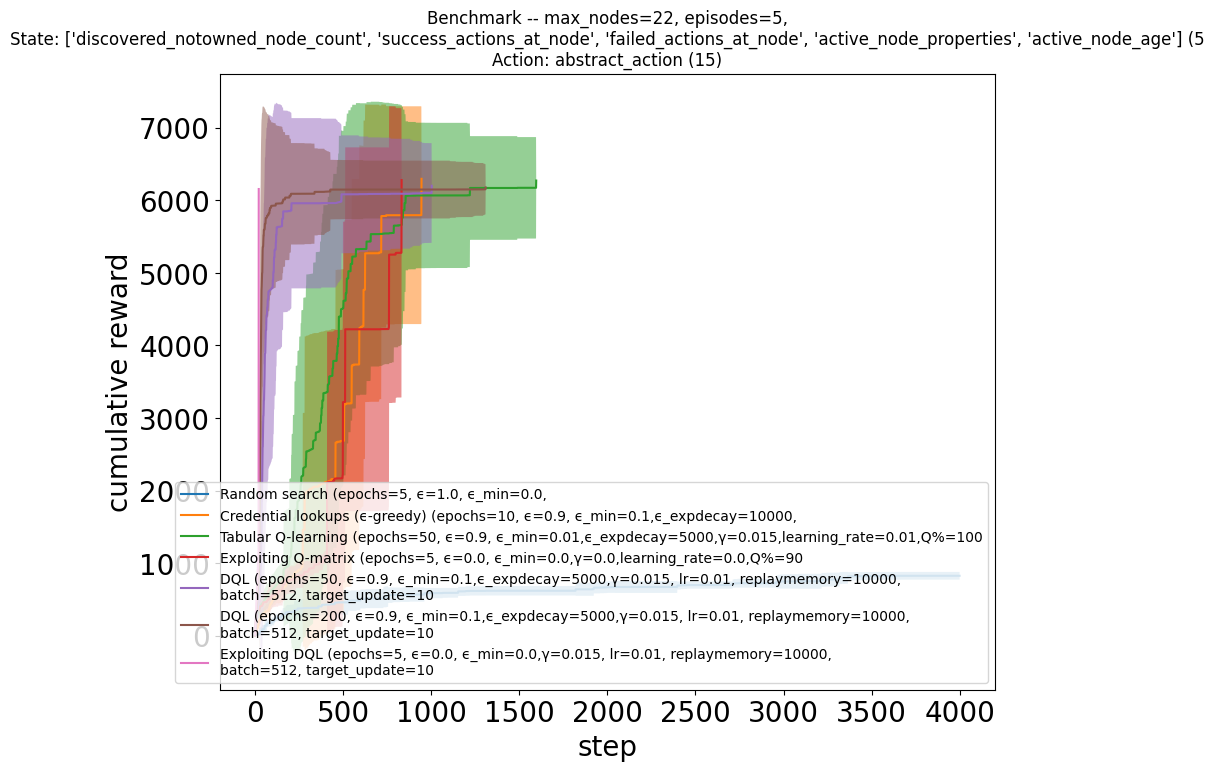

In [25]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

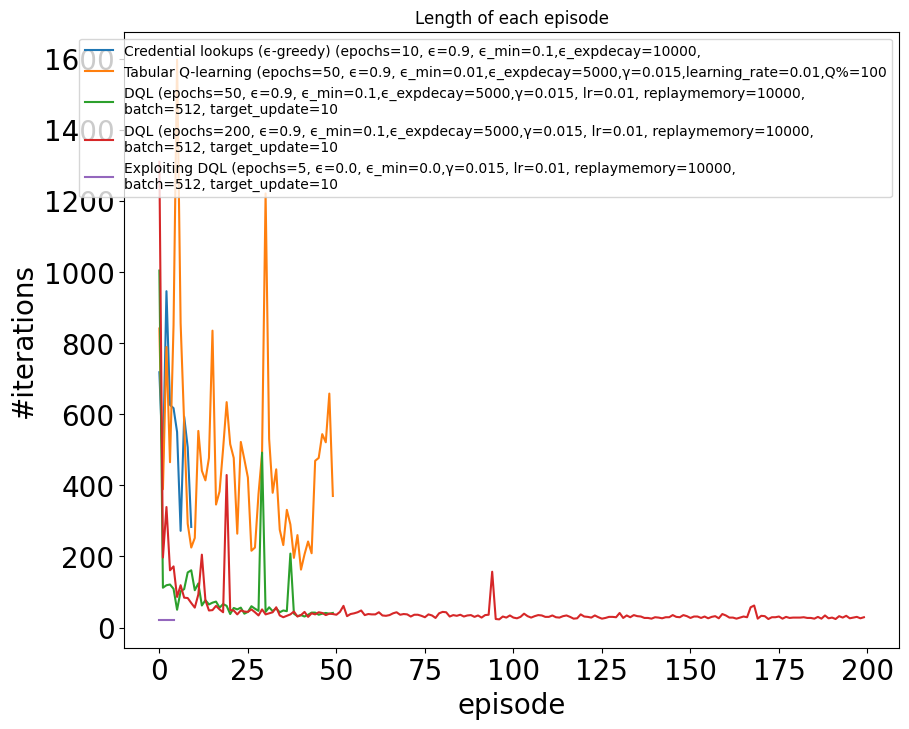

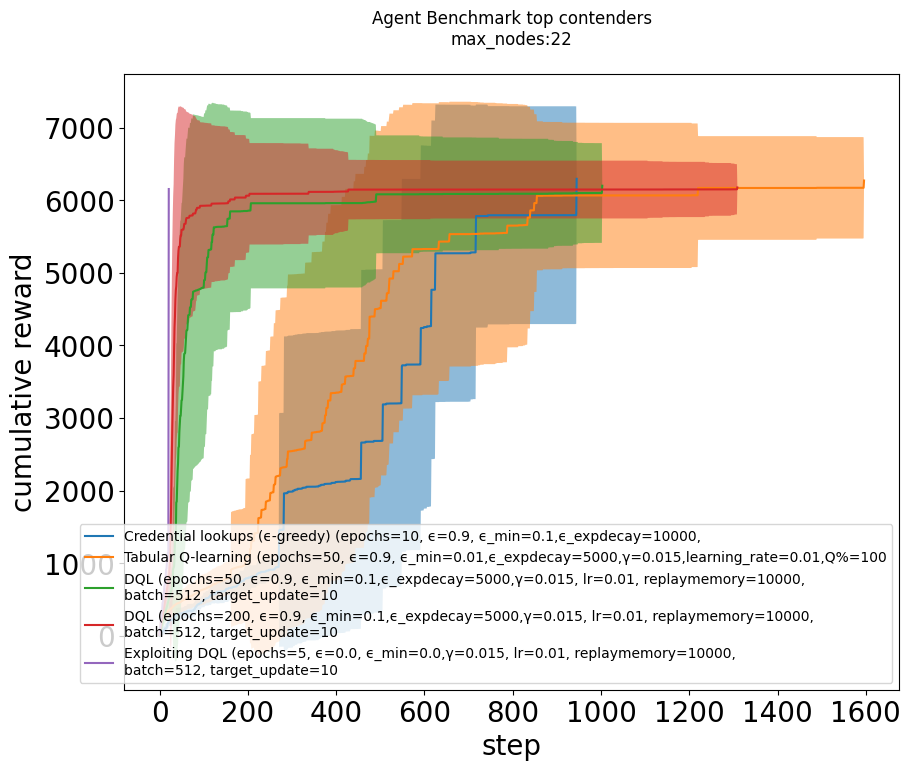

In [24]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

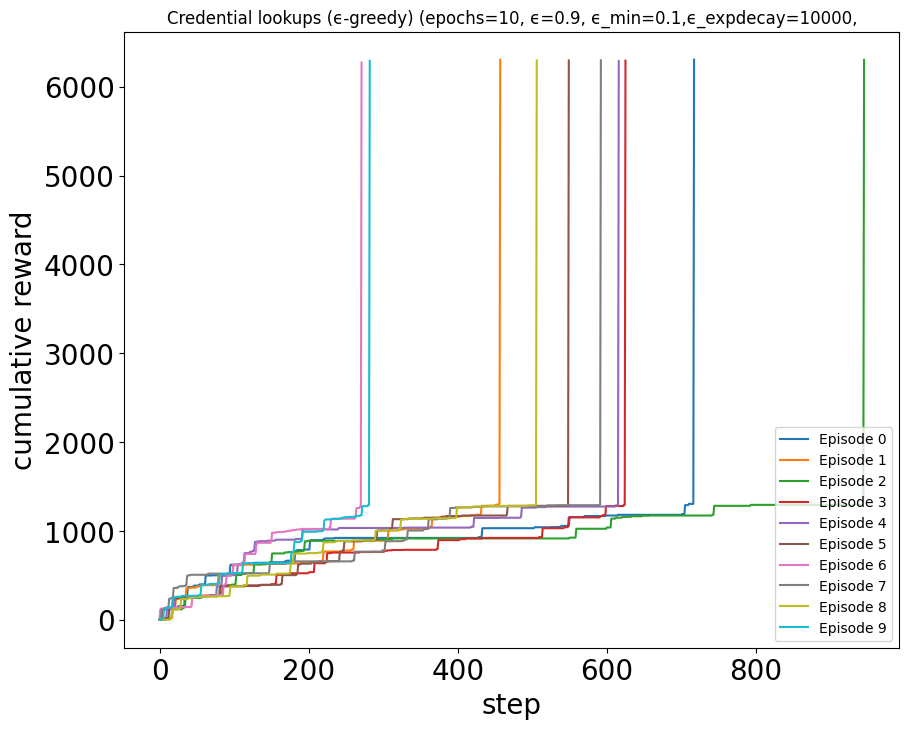

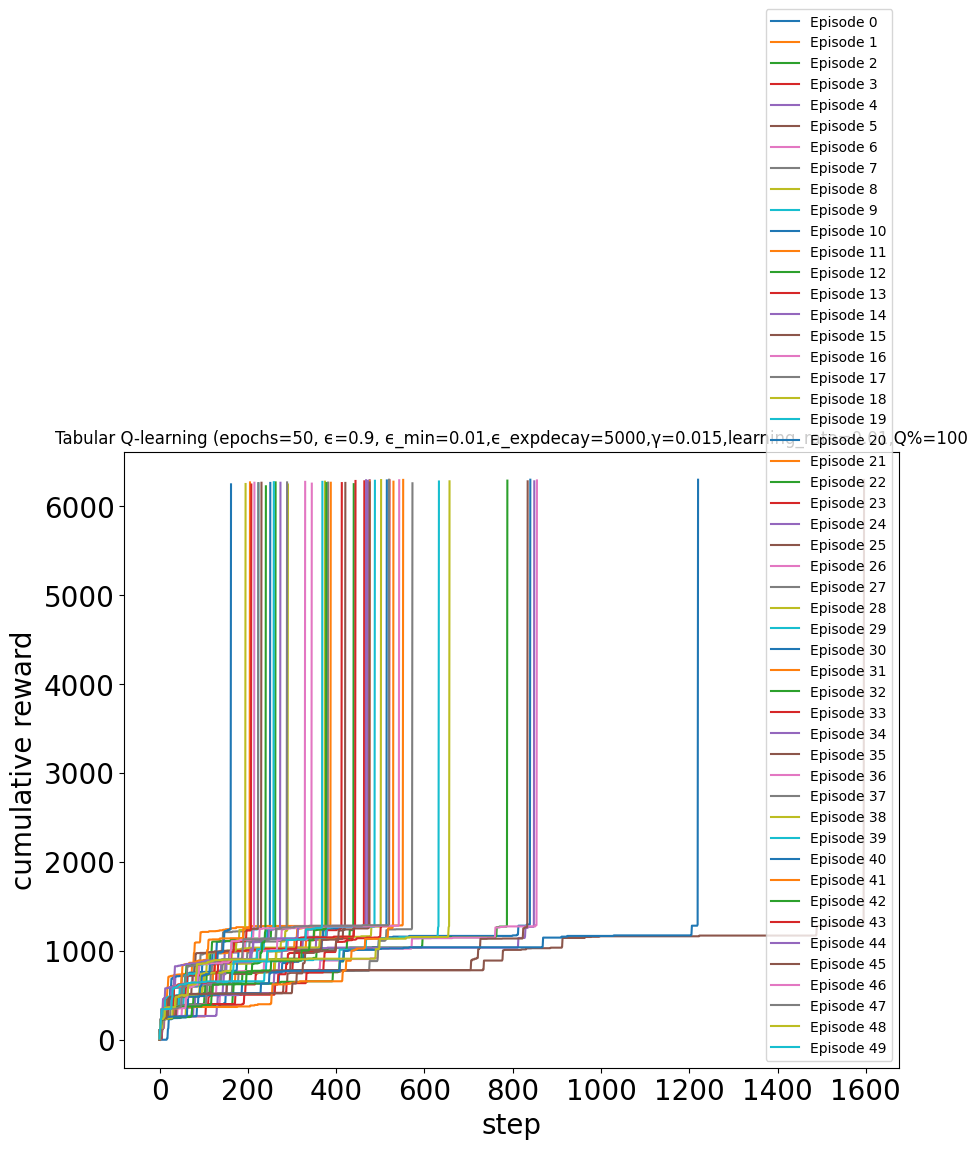

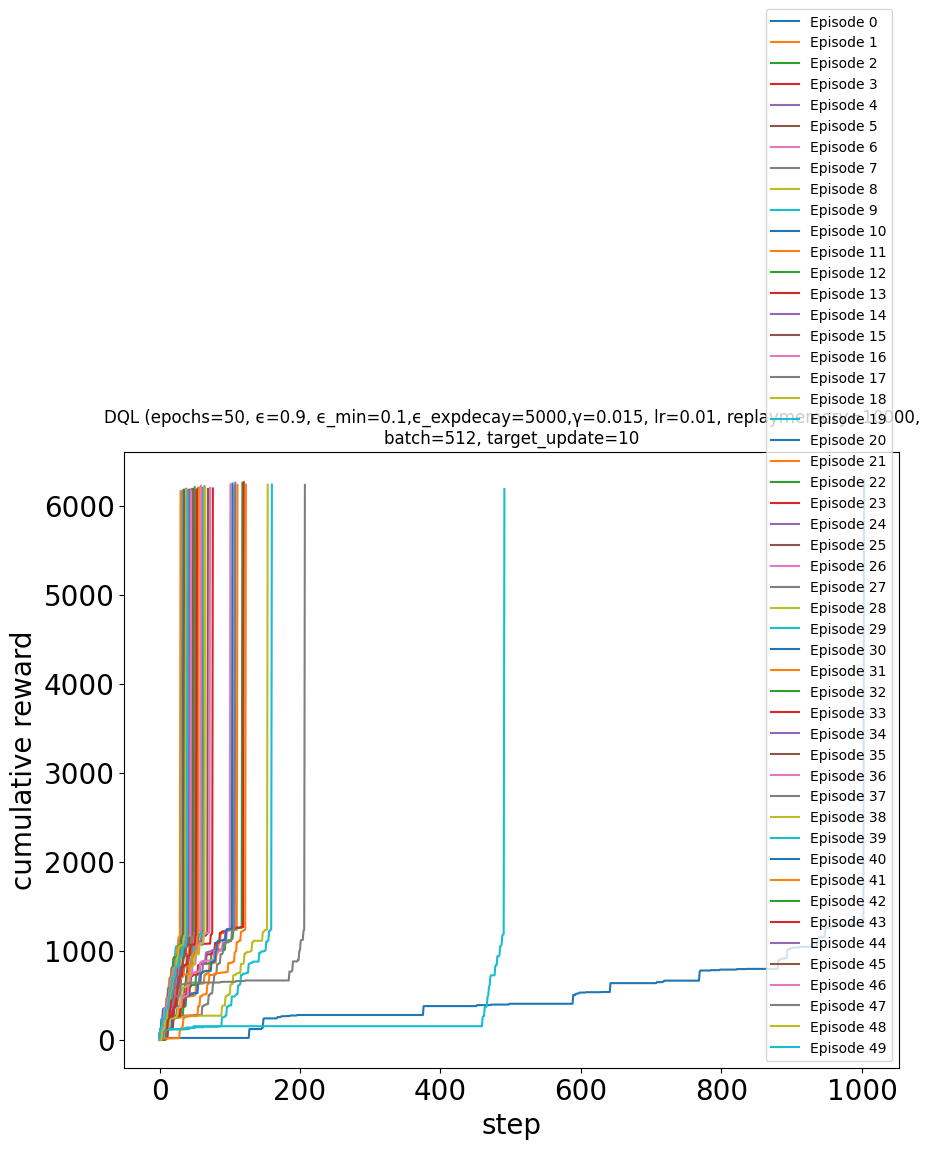

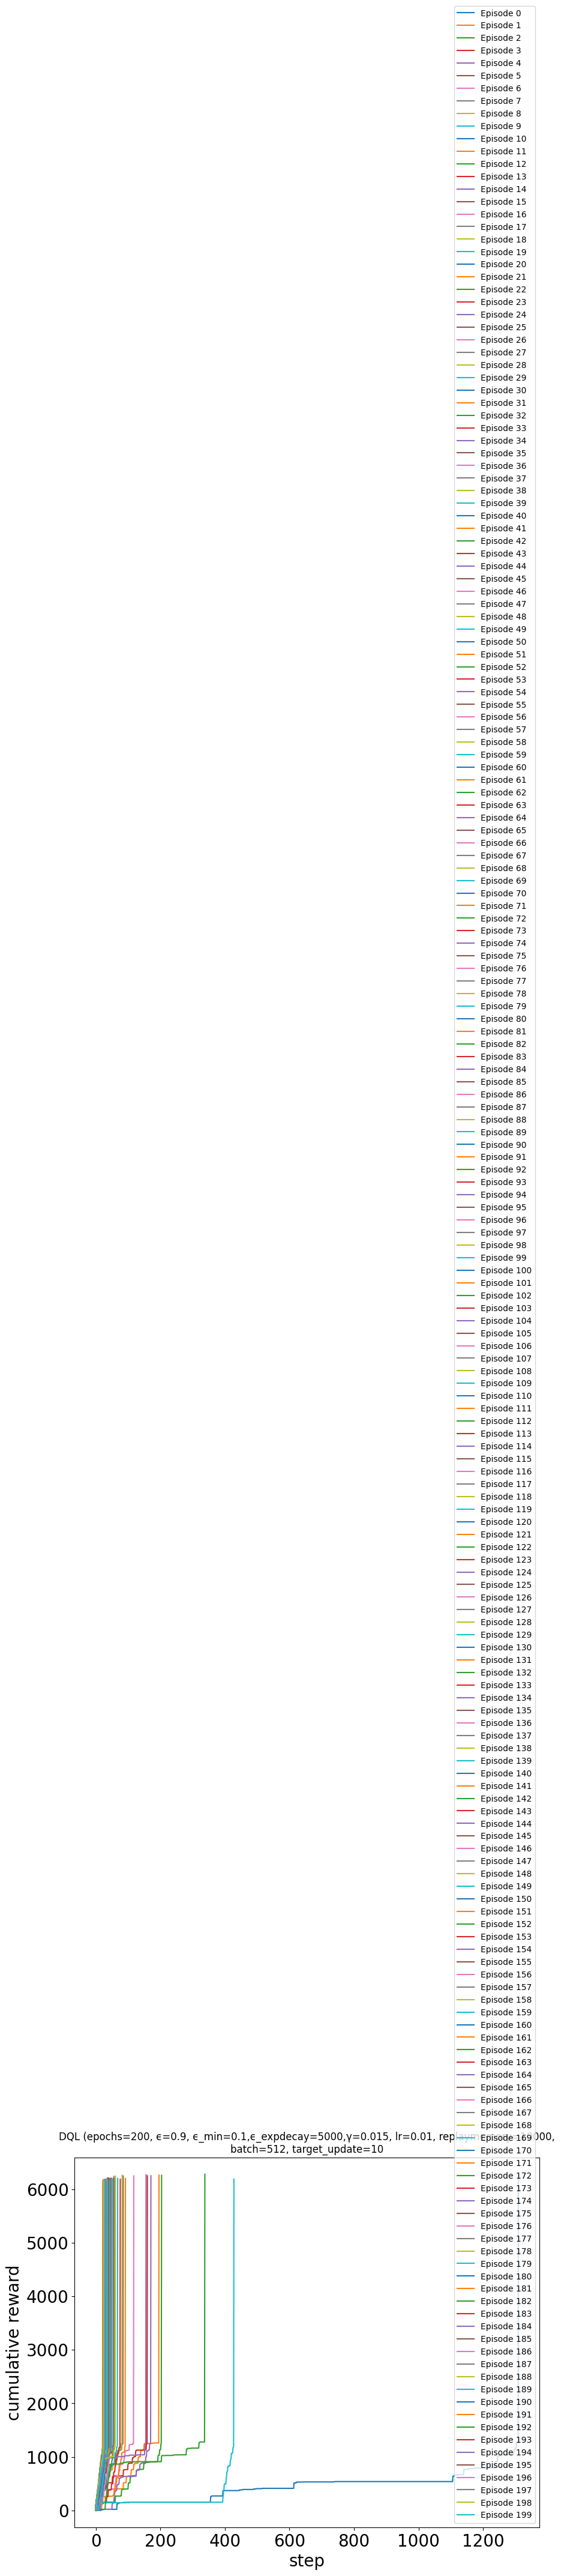

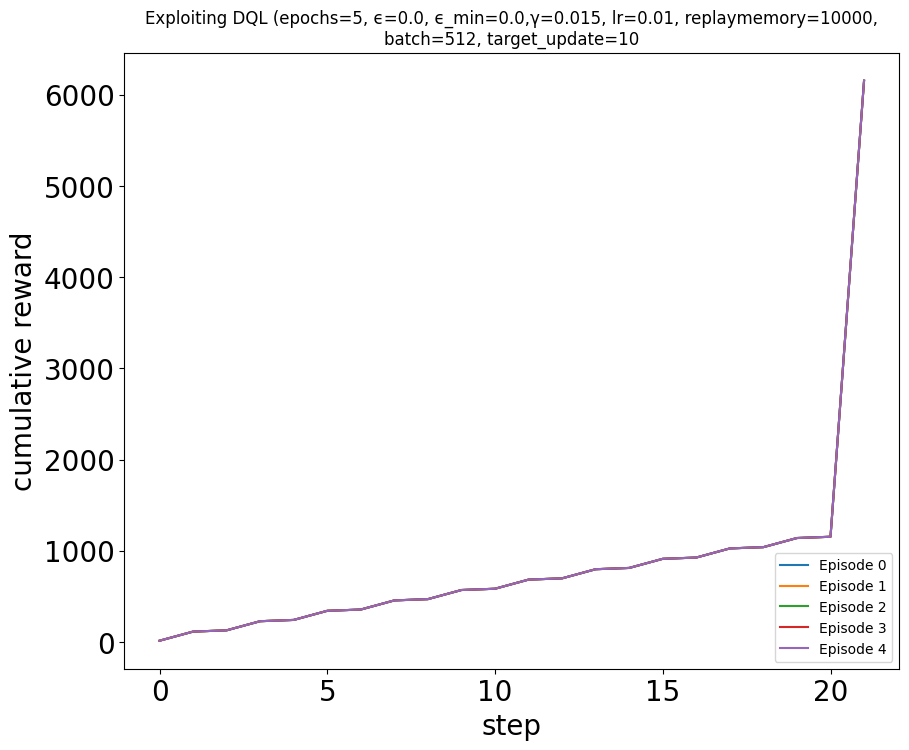

In [27]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)